### Load libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Load and view dataset

In [4]:
dataframe = pd.read_csv('US-pumpkins.csv')

In [5]:
dataframe.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


#### See a categorical feature

In [7]:
dataframe['Color'].unique()

array([nan, 'ORANGE', 'WHITE', 'STRIPED'], dtype=object)

#### Variables should not correlate in logistic regression

In [8]:
columns = ['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color']

In [9]:
pumpkins = dataframe[columns]

In [10]:
pumpkins.shape, dataframe.shape

((1757, 6), (1757, 26))

In [11]:
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
0,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
1,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE


In [12]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  1757 non-null   object
 1   Package    1757 non-null   object
 2   Variety    1752 non-null   object
 3   Origin     1754 non-null   object
 4   Item Size  1478 non-null   object
 5   Color      1141 non-null   object
dtypes: object(6)
memory usage: 82.5+ KB


#### remove nulls

In [13]:
pumpkins.dropna(inplace=True)

/var/folders/18/dhm8bhxd0470924gbwh_pvb00000gq/T/ipykernel_1226/3787954100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins.dropna(inplace=True)


#### Visualize color vs variety

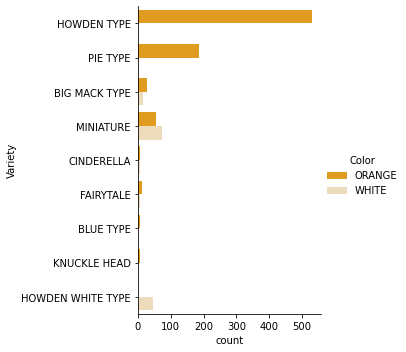

In [14]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}

sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",
palette=palette, 
)

#### Identify categorical and ordinal features

In [15]:
item_sizes = pumpkins['Item Size'].unique()
ordinal_features = ['Item Size']
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']


#### Transformer categorical and ordinal features to numeric features

In [16]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_features),
    ('ord', OrdinalEncoder(), ordinal_features),
])
transformed_data = ct.fit_transform(pumpkins)  

In [17]:
transformed_col_names = (
    ct.named_transformers_["cat"].get_feature_names_out().tolist()
    + ordinal_features
)

In [18]:
transformed_df = pd.DataFrame(transformed_data.toarray(), columns=transformed_col_names)

In [19]:
transformed_df.head()

,City Name_ATLANTA,City Name_BALTIMORE,City Name_BOSTON,City Name_CHICAGO,City Name_COLUMBIA,City Name_DALLAS,City Name_DETROIT,City Name_LOS ANGELES,City Name_MIAMI,City Name_NEW YORK,...,Origin_NEW JERSEY,Origin_NEW YORK,Origin_NORTH CAROLINA,Origin_OHIO,Origin_PENNSYLVANIA,Origin_TENNESSEE,Origin_TEXAS,Origin_VERMONT,Origin_VIRGINIA,Item Size
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


#### Transform output feature to labels

In [22]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [23]:
encoded_pumpkins = transformed_df.assign(Color=encoded_label)

#### Visualize color, variety and item size using whisker box plot

/var/folders/18/dhm8bhxd0470924gbwh_pvb00000gq/T/ipykernel_1226/4016135262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins['Item Size'] = encoded_pumpkins['Item Size']


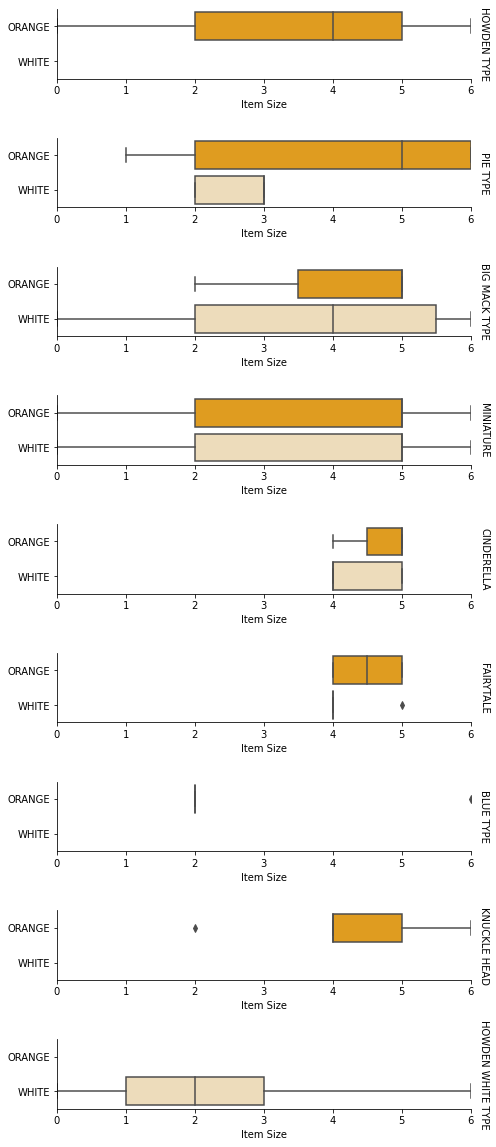

In [24]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}
pumpkins['Item Size'] = encoded_pumpkins['Item Size']

g = sns.catplot(
    data=pumpkins,
    x="Item Size", y="Color", row='Variety',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

#### Visualize item size vs color

/Users/tk-lpt-0687/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tk-lpt-0687/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='Item Size'>

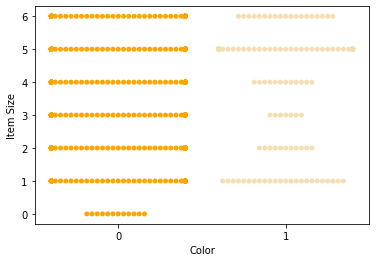

In [26]:
palette = {
0: 'orange',
1: 'wheat'
}
sns.swarmplot(x="Color", y="Item Size", data=encoded_pumpkins, palette=palette)

#### prepare dataset

In [27]:
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

#### split training and testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Create and train model

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Evaluate model on test data

In [30]:
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [31]:
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])